# HW4: Web Analytics/Web Usage Mining

In [1]:
# ! pip install pandas

In [2]:
import pandas as pd
from tqdm import tqdm

## Load the datasets

In [3]:
# Reading csv to a data frame
import pandas as pd
clicks = pd.read_csv('data/wum_dataset_hw/clicks.csv')

# Print clicks CSV columns headers
print(clicks.columns.tolist(), '\n')

# Display clicks head and tail
display(clicks.head(10))
display(clicks.tail(10))

# Filter clicks by PageName
display(clicks[clicks['PageName'] == 'APPLICATION'].head())

['LocalID', 'PageID', 'VisitID', 'PageName', 'CatName', 'CatID', 'ExtCatName', 'ExtCatID', 'TopicName', 'TopicID', 'TimeOnPage', 'PageScore', 'SequenceNumber'] 



,LocalID,PageID,VisitID,PageName,CatName,CatID,ExtCatName,ExtCatID,TopicName,TopicID,TimeOnPage,PageScore,SequenceNumber
0,648460,3044,1185,TravelAgency,Info,1,homepage,1,In general,1000,30,30,1
1,648461,3045,1185,tours with tents,Search,2,Catalog,5,Tourism,1,30,50,2
2,648462,3046,1185,hiking,Search,2,Catalog,5,Hiking,3,30,62,3
3,648463,3047,1185,mountain expedition,Search,2,Catalog,5,VHT,21,30,71,4
4,648464,3048,1185,water,Search,2,Catalog,5,Water,2,30,78,5
5,648465,3049,1185,rafting,Search,2,Catalog,5,rafting,24,30,83,6
6,648466,3050,1186,Norway journey to the far north Lofoten,Trip,3,undetected,-1,Tourism,1,300,300,1
7,648467,3051,1186,National parks and thermal Hungary and Slovakia,Trip,3,undetected,-1,Tourism,1,30,50,2
8,648468,3044,1187,TravelAgency,Info,1,homepage,1,In general,1000,30,30,1
9,648469,3046,1187,hiking,Search,2,Catalog,5,Hiking,3,60,101,2


,LocalID,PageID,VisitID,PageName,CatName,CatID,ExtCatName,ExtCatID,TopicName,TopicID,TimeOnPage,PageScore,SequenceNumber
38441,686900,5258,17264,Bulgaria stay with holiday trips 05,Trip,3,undetected,-1,Bulgaria,15,60,60,1
38442,686902,3214,17264,Bulgaria stay with trips vacation visit to Tur...,Trip,3,undetected,-1,Bulgaria,15,60,125,3
38443,686903,3481,17264,Dutch tulip country,Trip,3,undetected,-1,Tours with accommodation,8,60,143,4
38444,686904,3093,17264,New Year&#39;s Eve New Year&#39;s Eve 04 05 cr...,Trip,3,undetected,-1,Ski,9,30,78,5
38445,686905,3044,17265,TravelAgency,Info,1,homepage,1,In general,1000,30,30,1
38446,686906,3052,17265,Far tours,Search,2,Catalog,5,exotica,5,120,203,2
38447,686907,3078,17265,Mexico Guatemala Belize Honduras,Trip,3,undetected,-1,exotica,5,120,251,3
38448,686908,3854,17265,Mexico Guatemala Honduras Mayan big way,Trip,3,undetected,-1,exotica,5,120,286,4
38449,686909,3599,17265,Kenya Tanzania safari and Zanzibar,Trip,3,undetected,-1,exotica,5,60,156,5
38450,686910,3250,17266,Norway Norwegian fjords,Trip,3,undetected,-1,Tours with accommodation,8,30,30,1


,LocalID,PageID,VisitID,PageName,CatName,CatID,ExtCatName,ExtCatID,TopicName,TopicID,TimeOnPage,PageScore,SequenceNumber
175,648633,3118,1259,APPLICATION,Application,5,Application,9,In general,1000,30,30,1
2223,650682,3459,2103,APPLICATION,Application,5,Application,9,In general,1000,60,60,1
2224,650684,3460,2103,APPLICATION,Application,5,Application,9,In general,1000,30,62,3
3116,651576,3550,2479,APPLICATION,Application,5,Application,9,In general,1000,30,30,1
4228,652686,3678,2914,APPLICATION,Application,5,Application,9,In general,1000,240,503,3


## Get basic general statistics

In [4]:
# Display clicks head and tail
print(f"Total clicks: {len(clicks)}")
print(f"Total visits: {len(set(clicks['VisitID'].to_list()))}")

Total clicks: 38451
Total visits: 15560


## Identify main conversions

In [5]:
print('Transactions leading to reservation of the trip (APPLICATION):', '\n')
application_conv_df = clicks[(clicks['PageName'] == 'APPLICATION') | (clicks['CatName'] == 'APPLICATION') | (clicks['ExtCatName'] == 'APPLICATION')]
print(f"Total: {len(application_conv_df)}")
display(application_conv_df)

print('\n', 'Transactions leading to request the printed catalog (CATALOG):', '\n')
catalog_conv_df = clicks[(clicks['PageName'] == 'CATALOG') | (clicks['CatName'] == 'CATALOG') | (clicks['ExtCatName'] == 'CATALOG')]
print(f"Total: {len(catalog_conv_df)}")
display(catalog_conv_df)

Transactions leading to reservation of the trip (APPLICATION): 

Total: 56


,LocalID,PageID,VisitID,PageName,CatName,CatID,ExtCatName,ExtCatID,TopicName,TopicID,TimeOnPage,PageScore,SequenceNumber
175,648633,3118,1259,APPLICATION,Application,5,Application,9,In general,1000,30,30,1
2223,650682,3459,2103,APPLICATION,Application,5,Application,9,In general,1000,60,60,1
2224,650684,3460,2103,APPLICATION,Application,5,Application,9,In general,1000,30,62,3
3116,651576,3550,2479,APPLICATION,Application,5,Application,9,In general,1000,30,30,1
4228,652686,3678,2914,APPLICATION,Application,5,Application,9,In general,1000,240,503,3
4541,653001,3722,3049,APPLICATION,Application,5,Application,9,In general,1000,30,30,1
4740,653200,3742,3131,APPLICATION,Application,5,Application,9,In general,1000,30,71,4
6748,655207,3889,4006,APPLICATION,Application,5,Application,9,In general,1000,30,30,1
8162,656622,3970,4598,APPLICATION,Application,5,Application,9,In general,1000,30,30,1
8335,656795,3977,4685,APPLICATION,Application,5,Application,9,In general,1000,30,30,1



 Transactions leading to request the printed catalog (CATALOG): 

Total: 646


,LocalID,PageID,VisitID,PageName,CatName,CatID,ExtCatName,ExtCatID,TopicName,TopicID,TimeOnPage,PageScore,SequenceNumber
27,648487,3065,1189,CATALOG,Info,4,Send catalog,7,In general,1000,30,88,7
49,648509,3065,1200,CATALOG,Info,4,Send catalog,7,In general,1000,120,203,2
67,648527,3065,1207,CATALOG,Info,4,Send catalog,7,In general,1000,30,71,4
111,648571,3065,1226,CATALOG,Info,4,Send catalog,7,In general,1000,60,101,2
138,648598,3065,1239,CATALOG,Info,4,Send catalog,7,In general,1000,60,101,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38038,686494,3065,17095,CATALOG,Info,4,Send catalog,7,In general,1000,120,251,3
38053,686512,3065,17101,CATALOG,Info,4,Send catalog,7,In general,1000,30,50,2
38090,686545,3065,17113,CATALOG,Info,4,Send catalog,7,In general,1000,120,369,8
38100,686555,3065,17116,CATALOG,Info,4,Send catalog,7,In general,1000,120,286,4


## Identify micro conversions

In [6]:
print('\n', 'DISCOUNT:', '\n')
discount_conv_df = clicks[(clicks['PageName'] == 'DISCOUNT') | (clicks['CatName'] == 'DISCOUNT') | (clicks['ExtCatName'] == 'DISCOUNT')]
print(f"Total: {len(discount_conv_df)}")
display(discount_conv_df)

print('\n', 'HOWTOJOIN:', '\n')
howtojoin_conv_df = clicks[(clicks['PageName'] == 'HOWTOJOIN') | (clicks['CatName'] == 'HOWTOJOIN') | (clicks['ExtCatName'] == 'HOWTOJOIN')]
print(f"Total: {len(howtojoin_conv_df)}")
display(howtojoin_conv_df)

print('\n', 'INSURANCE:', '\n')
insurance_conv_df = clicks[(clicks['PageName'] == 'INSURANCE') | (clicks['CatName'] == 'INSURANCE') | (clicks['ExtCatName'] == 'INSURANCE')]
print(f"Total: {len(insurance_conv_df)}")
display(insurance_conv_df)

print('\n', 'WHOWEARE:', '\n')
whoweare_conv_df = clicks[(clicks['PageName'] == 'WHOWEARE') | (clicks['CatName'] == 'WHOWEARE') | (clicks['ExtCatName'] == 'WHOWEARE')]
print(f"Total: {len(whoweare_conv_df)}")
display(whoweare_conv_df)


 DISCOUNT: 

Total: 244


,LocalID,PageID,VisitID,PageName,CatName,CatID,ExtCatName,ExtCatID,TopicName,TopicID,TimeOnPage,PageScore,SequenceNumber
37,648494,3066,1192,DISCOUNT,Info,4,Sales,8,In general,1000,60,143,4
38,648496,3066,1192,DISCOUNT,Info,4,Sales,8,In general,1000,30,83,6
94,648554,3099,1216,DISCOUNT,Info,4,Sales,8,In general,1000,30,101,11
234,648693,3066,1280,DISCOUNT,Info,4,Sales,8,In general,1000,240,670,6
242,648702,3066,1284,DISCOUNT,Info,4,Sales,8,In general,1000,30,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37519,685978,3066,16872,DISCOUNT,Info,4,Sales,8,In general,1000,180,575,9
37610,686067,3066,16910,DISCOUNT,Info,4,Sales,8,In general,1000,60,101,2
37821,686280,3066,17007,DISCOUNT,Info,4,Sales,8,In general,1000,180,554,8
37843,686303,3066,17014,DISCOUNT,Info,4,Sales,8,In general,1000,30,50,2



 HOWTOJOIN: 

Total: 56


,LocalID,PageID,VisitID,PageName,CatName,CatID,ExtCatName,ExtCatID,TopicName,TopicID,TimeOnPage,PageScore,SequenceNumber
92,648552,3097,1216,HOWTOJOIN,Trip,3,undetected,-1,exotica,5,60,191,9
103,648563,3094,1220,HOWTOJOIN,Trip,3,undetected,-1,Tourism,1,30,30,1
477,648937,3201,1379,HOWTOJOIN,Trip,3,undetected,-1,Tours with accommodation,8,30,30,1
2189,650649,3201,2077,HOWTOJOIN,Trip,3,undetected,-1,Tours with accommodation,8,30,30,1
3935,652395,3643,2794,HOWTOJOIN,Trip,3,undetected,-1,Alps,22,30,30,1
4622,653082,3729,3082,HOWTOJOIN,Trip,3,undetected,-1,Tours with lightweight tourism,19,30,30,1
4824,653284,3729,3168,HOWTOJOIN,Trip,3,undetected,-1,Tours with lightweight tourism,19,30,30,1
5377,653837,3782,3384,HOWTOJOIN,Trip,3,undetected,-1,Tourism,1,30,30,1
6257,654717,3729,3790,HOWTOJOIN,Trip,3,undetected,-1,Tours with lightweight tourism,19,30,30,1
6610,655070,3880,3936,HOWTOJOIN,Trip,3,undetected,-1,undetected,-2,30,50,2



 INSURANCE: 

Total: 45


,LocalID,PageID,VisitID,PageName,CatName,CatID,ExtCatName,ExtCatID,TopicName,TopicID,TimeOnPage,PageScore,SequenceNumber
266,648726,3138,1294,INSURANCE,Info,1,Insurance,6,In general,1000,30,71,4
1291,649748,3138,1695,INSURANCE,Info,1,Insurance,6,In general,1000,30,50,2
1351,649811,3138,1713,INSURANCE,Info,1,Insurance,6,In general,1000,30,50,2
1542,649992,3138,1786,INSURANCE,Info,1,Insurance,6,In general,1000,180,689,17
1688,650148,3389,1855,INSURANCE,Info,1,Insurance,6,In general,1000,30,30,1
3641,652099,3138,2678,INSURANCE,Info,1,Insurance,6,In general,1000,120,286,4
3928,652389,3138,2789,INSURANCE,Info,1,Insurance,6,In general,1000,30,78,5
5897,654357,3818,3631,INSURANCE,Info,1,Insurance,6,In general,1000,30,30,1
6335,654795,3857,3819,INSURANCE,Info,1,Insurance,6,In general,1000,30,30,1
6425,654885,3869,3860,INSURANCE,Info,1,Insurance,6,In general,1000,30,30,1



 WHOWEARE: 

Total: 266


,LocalID,PageID,VisitID,PageName,CatName,CatID,ExtCatName,ExtCatID,TopicName,TopicID,TimeOnPage,PageScore,SequenceNumber
56,648515,3075,1204,WHOWEARE,Info,4,Who we are,10,In general,1000,60,101,2
411,648871,3075,1345,WHOWEARE,Info,4,Who we are,10,In general,1000,60,101,2
553,649013,3075,1408,WHOWEARE,Info,4,Who we are,10,In general,1000,30,62,3
559,649017,3075,1410,WHOWEARE,Info,4,Who we are,10,In general,1000,180,377,3
573,649030,3075,1416,WHOWEARE,Info,4,Who we are,10,In general,1000,30,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37341,685804,3075,16793,WHOWEARE,Info,4,Who we are,10,In general,1000,30,88,7
37598,686056,3075,16905,WHOWEARE,Info,4,Who we are,10,In general,1000,30,50,2
37688,686146,3075,16943,WHOWEARE,Info,4,Who we are,10,In general,1000,120,251,3
38217,686676,3075,17162,WHOWEARE,Info,4,Who we are,10,In general,1000,60,125,3


## Filter uninteresting columns from the dataset

In [7]:
display(clicks.head())

def filter_columns(df, columns):
    for to_del in columns:
        try:
            del df[to_del]
            print(f"Column {to_del} deleted.")
        except KeyError:
            print(f"Column {to_del} not found.")

columns_to_delete = ['LocalID', 'PageID', 'CatID', 'ExtCatID', 'TopicID', 'PageScore']
clicks_cleaned = clicks
filter_columns(clicks_cleaned, columns_to_delete)

display(clicks_cleaned.head())

,LocalID,PageID,VisitID,PageName,CatName,CatID,ExtCatName,ExtCatID,TopicName,TopicID,TimeOnPage,PageScore,SequenceNumber
0,648460,3044,1185,TravelAgency,Info,1,homepage,1,In general,1000,30,30,1
1,648461,3045,1185,tours with tents,Search,2,Catalog,5,Tourism,1,30,50,2
2,648462,3046,1185,hiking,Search,2,Catalog,5,Hiking,3,30,62,3
3,648463,3047,1185,mountain expedition,Search,2,Catalog,5,VHT,21,30,71,4
4,648464,3048,1185,water,Search,2,Catalog,5,Water,2,30,78,5


Column LocalID deleted.
Column PageID deleted.
Column CatID deleted.
Column ExtCatID deleted.
Column TopicID deleted.
Column PageScore deleted.


,VisitID,PageName,CatName,ExtCatName,TopicName,TimeOnPage,SequenceNumber
0,1185,TravelAgency,Info,homepage,In general,30,1
1,1185,tours with tents,Search,Catalog,Tourism,30,2
2,1185,hiking,Search,Catalog,Hiking,30,3
3,1185,mountain expedition,Search,Catalog,VHT,30,4
4,1185,water,Search,Catalog,Water,30,5


## Design data representation for the analysis

In [8]:
pd.set_option('display.max_colwidth', None)

# Data reduction (test purposes)
# clicks = clicks.head(1000)

# Collect the pages and categories unique values
# pages = set()
categories = set()
for index, row in clicks.iterrows():
#     pages.add(row['PageName'].lower())
    categories.add(row['CatName'].lower())
    categories.add(row['ExtCatName'].lower())
# print([len(pages), len(categories)])
print(len(categories))

# Groups rows by the VisitID
clicks_grouped = clicks_cleaned.groupby('VisitID')

def process_visit(group):
    res = {}
    visit_len = 0.0
#     for p in pages:
#         res['PageName' + '_' + p] = False
    for c in categories:
        res['Category' + '_' + c] = False
    for index, row in group.iterrows():
        res['VisitID'] = row['VisitID']
        visit_len += row['TimeOnPage']
#         collect_columns = ['PageName', 'CatName', 'ExtCatName']
        collect_columns = ['CatName', 'ExtCatName']
        for name, val in row.items():
#             if name == 'PageName':
#                 res['PageName' + '_' + val.lower()] = True
            if name in ['CatName', 'ExtCatName']:
                res['Category' + '_' + val.lower()] = True
    res['VisitLen'] = visit_len
    return res

visits_matrix = clicks_grouped.apply(process_visit).to_list()

visits_matrix = pd.DataFrame(visits_matrix)

# Re-arange the columns
cols = visits_matrix.columns.tolist()
cols = cols[-2:] + cols[:-2]
visits_matrix = visits_matrix[cols]

display(visits_matrix)

28


,VisitID,VisitLen,Category_detail406,Category_extension,Category_travel_agency,Category_sales,Category_info,Category_top2,Category_search,Category_blade,...,Category_default,Category_catalog,Category_undetected,Category_kw,Category_application,Category_photo competition,Category_insurance,Category_story,Category_homepage,Category_trip
0,1185,180.0,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
1,1186,330.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,1187,480.0,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
3,1188,30.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,1189,600.0,False,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,17262,30.0,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
15556,17263,30.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
15557,17264,270.0,False,False,False,False,False,False,True,False,...,False,True,True,False,False,False,False,False,False,True
15558,17265,450.0,False,False,False,False,True,False,True,False,...,False,True,True,False,False,False,False,False,True,True


## Filter the visits

In [9]:
visits_matrix = visits_matrix[visits_matrix['VisitLen'] > 30]
display(visits_matrix)

,VisitID,VisitLen,Category_detail406,Category_extension,Category_travel_agency,Category_sales,Category_info,Category_top2,Category_search,Category_blade,...,Category_default,Category_catalog,Category_undetected,Category_kw,Category_application,Category_photo competition,Category_insurance,Category_story,Category_homepage,Category_trip
0,1185,180.0,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
1,1186,330.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,1187,480.0,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,1189,600.0,False,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
5,1190,210.0,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15550,17257,330.0,False,False,False,False,True,False,True,False,...,False,True,True,False,False,False,False,False,True,True
15551,17258,60.0,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
15553,17260,150.0,False,False,False,False,True,False,True,False,...,False,True,True,False,False,False,False,False,True,True
15557,17264,270.0,False,False,False,False,False,False,True,False,...,False,True,True,False,False,False,False,False,False,True


## Identify main conversions

In [10]:
print('Transactions leading to reservation of the trip (APPLICATION):', '\n')
display(visits_matrix[visits_matrix['Category_application'] == True])

print('\n', 'Transactions leading to request the printed catalog (CATALOG):', '\n')
display(visits_matrix[visits_matrix['Category_catalog'] == True])

print('\n', 'DISCOUNT:', '\n')
if 'Category_discount' in visits_matrix.columns.tolist():
    display(visits_matrix[visits_matrix['Category_discount'] == True])
else:
    print("Total: 0")

print('\n', 'HOWTOJOIN:', '\n')
if 'Category_howtojoin' in visits_matrix.columns.tolist():
    display(visits_matrix[visits_matrix['Category_howtojoin'] == True])
else:
    print("Total: 0")
    
print('\n', 'INSURANCE:', '\n')
if 'Category_insurance' in visits_matrix.columns.tolist():
    display(visits_matrix[visits_matrix['Category_insurance'] == True])
else:
    print("Total: 0")

print('\n', 'WHOWEARE:', '\n')
if 'Category_whoweare' in visits_matrix.columns.tolist():
    display(visits_matrix[visits_matrix['Category_whoweare'] == True])
else:
    print("Total: 0")

Transactions leading to reservation of the trip (APPLICATION): 



,VisitID,VisitLen,Category_detail406,Category_extension,Category_travel_agency,Category_sales,Category_info,Category_top2,Category_search,Category_blade,...,Category_default,Category_catalog,Category_undetected,Category_kw,Category_application,Category_photo competition,Category_insurance,Category_story,Category_homepage,Category_trip
74,1259,420.0,False,True,False,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
897,2103,210.0,False,False,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
1692,2914,1050.0,False,False,False,True,True,False,False,False,...,False,False,True,False,True,False,False,False,True,True
1902,3131,300.0,False,False,False,False,True,False,True,False,...,False,True,True,False,True,False,False,False,True,True
2749,4006,60.0,False,False,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
4814,6146,120.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5257,6612,600.0,False,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,True,True,False
7074,8505,150.0,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
7988,9434,420.0,False,False,False,False,False,False,True,False,...,False,True,True,False,True,False,False,False,False,True
8469,9936,840.0,False,True,False,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,True



 Transactions leading to request the printed catalog (CATALOG): 



,VisitID,VisitLen,Category_detail406,Category_extension,Category_travel_agency,Category_sales,Category_info,Category_top2,Category_search,Category_blade,...,Category_default,Category_catalog,Category_undetected,Category_kw,Category_application,Category_photo competition,Category_insurance,Category_story,Category_homepage,Category_trip
0,1185,180.0,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
2,1187,480.0,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,1189,600.0,False,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
5,1190,210.0,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,False
7,1192,420.0,False,True,False,True,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15550,17257,330.0,False,False,False,False,True,False,True,False,...,False,True,True,False,False,False,False,False,True,True
15551,17258,60.0,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
15553,17260,150.0,False,False,False,False,True,False,True,False,...,False,True,True,False,False,False,False,False,True,True
15557,17264,270.0,False,False,False,False,False,False,True,False,...,False,True,True,False,False,False,False,False,False,True



 DISCOUNT: 

Total: 0

 HOWTOJOIN: 

Total: 0

 INSURANCE: 



,VisitID,VisitLen,Category_detail406,Category_extension,Category_travel_agency,Category_sales,Category_info,Category_top2,Category_search,Category_blade,...,Category_default,Category_catalog,Category_undetected,Category_kw,Category_application,Category_photo competition,Category_insurance,Category_story,Category_homepage,Category_trip
109,1294,180.0,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,False
279,1468,1680.0,False,False,False,True,True,False,True,False,...,False,True,True,False,False,False,True,False,True,True
488,1682,60.0,False,False,False,False,True,False,False,True,...,False,False,True,False,False,False,True,False,False,False
501,1695,180.0,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,True,True
519,1713,60.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
592,1786,1890.0,False,True,False,False,True,False,True,False,...,False,True,True,False,False,False,True,False,True,True
1006,2216,60.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1250,2465,2100.0,False,False,False,False,True,False,True,False,...,False,True,True,False,False,False,True,False,True,True
1456,2678,1230.0,False,True,False,True,True,False,True,False,...,False,True,True,False,False,False,True,False,True,True
1567,2789,240.0,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,False,True,False



 WHOWEARE: 

Total: 0


### Apriori algorithm implementation

In [11]:
from collections import Counter

def frequentItems(transactions, min_support, max_support):
    counter = Counter()
    for trans in transactions:
        counter.update(frozenset([t]) for t in trans)
    return set(item for item in counter if (counter[item]/len(transactions) >= min_support) and (counter[item]/len(transactions) <= max_support)), counter

def generateCandidates(L, k):
    candidates = set()
    for a in L:
        for b in L:
            union = a | b
            if len(union) == k and a != b:
                candidates.add(union)
    return candidates

def filterCandidates(transactions, itemsets, min_support, max_support):
    counter = Counter()
    for trans in transactions:
        subsets = [itemset for itemset in itemsets if itemset.issubset(trans)]
        counter.update(subsets)
    return set(item for item in counter if (counter[item]/len(transactions) >= min_support and counter[item]/len(transactions) <= max_support)), counter

def apriori(transactions, min_support, max_support, max_len=4):
    result = list()
    resultc = Counter()
    candidates, counter = frequentItems(transactions, min_support, max_support)
    result += candidates
    resultc += counter
    k = 2
    while candidates:
        candidates = generateCandidates(candidates, k)
        candidates,counter = filterCandidates(transactions, candidates, min_support, max_support)
        result += candidates
        resultc += counter
        k += 1
        if k >= max_len:
            break;
    resultc = {item:(resultc[item]/len(transactions)) for item in resultc}
    return result, resultc

## Association rule analysis

In [12]:
def generateRules(frequentItemsets, supports, minConfidence):
    result = []
    for fset in frequentItemsets:
        for consequent in fset:
            antecedent = set(fset).difference([consequent])
            support = supports[fset]
            confidence = support
            if len(antecedent) > 0:
                confidence = support/supports[frozenset(antecedent)]
            if confidence > minConfidence:
                result.append({
                    "antecedent": antecedent,
                    "consequent": consequent,
                    "len": len(fset),
                    "support": support,
                    "confidence": confidence
                })
    return pd.DataFrame(result)

dataset = []
for index, row in tqdm(visits_matrix.iterrows(), total=len(visits_matrix)):
    row = [col+"="+str(row[col]) for col in list(visits_matrix)]
    dataset.append(row)

100%|██████████| 6776/6776 [00:01<00:00, 4250.17it/s]


In [13]:
frequentItemsets, supports = apriori(dataset, 0.4, 1, 4)

In [14]:
# for f in frequentItemsets:
#     print("{} - {}".format(f,supports[f]))

In [15]:
rules = generateRules(frequentItemsets, supports, 0.5)
rules_main_conv = rules[(rules['len'] > 1) & (rules['consequent'].str.contains("Category_application=False", regex=False))].sort_values(['support', 'confidence'], ascending=[False, False])
display(rules_main_conv)
rules_main_conv = rules[(rules['len'] > 1) & (rules['consequent'].str.contains("Category_catalog=True", regex=False))].sort_values(['support', 'confidence'], ascending=[False, False])
display(rules_main_conv)

,antecedent,consequent,len,support,confidence
186,{Category_detail184=False},Category_application=False,2,0.997196,0.997196
450,{Category_travel_agency=False},Category_application=False,2,0.997196,0.997196
566,{Category_detail406=False},Category_application=False,2,0.997196,0.997196
2894,"{Category_detail406=False, Category_travel_agency=False}",Category_application=False,3,0.997196,0.997196
4214,"{Category_detail184=False, Category_travel_agency=False}",Category_application=False,3,0.997196,0.997196
...,...,...,...,...,...
3218,"{Category_homepage=True, Category_extension=False}",Category_application=False,3,0.539847,0.998090
8316,"{Category_catalog=True, Category_info=True}",Category_application=False,3,0.531877,0.998891
9185,"{Category_undetected=True, Category_catalog=True}",Category_application=False,3,0.526417,0.998321
2573,"{Category_trip=True, Category_catalog=True}",Category_application=False,3,0.524055,0.998313


,antecedent,consequent,len,support,confidence
270,{Category_search=True},Category_catalog=True,2,0.803424,0.912504
3251,"{Category_top2=False, Category_search=True}",Category_catalog=True,3,0.803424,0.912504
4781,"{Category_search=True, Category_photo competition=False}",Category_catalog=True,3,0.803424,0.912504
5828,"{Category_search=True, Category_travel_agency=False}",Category_catalog=True,3,0.803424,0.912504
5837,"{Category_dir=False, Category_search=True}",Category_catalog=True,3,0.803424,0.912504
...,...,...,...,...,...
4494,"{Category_info=True, Category_extension=False}",Category_catalog=True,3,0.483471,0.839569
5246,"{Category_trip=True, Category_extension=False}",Category_catalog=True,3,0.482290,0.852374
2446,"{Category_info=True, Category_send catalog=False}",Category_catalog=True,3,0.482143,0.844623
2783,"{Category_homepage=True, Category_send catalog=False}",Category_catalog=True,3,0.470779,0.847953


In [16]:
# frequentItemsets, supports = apriori(dataset, 0.00014, 0.00015, 2)

## Visits clustering analysis

In [74]:
import networkx as nx
from node2vec import Node2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Collect the pages unique values
pages = set()
for index, row in clicks.iterrows():
    pages.add(row['PageName'].lower())

# Groups rows by the VisitID
clicks_grouped = clicks_cleaned.groupby('VisitID')

def process_visit_page(group):
    res = {}
    visit_len = 0.0
    for p in pages:
        res['PageName' + '_' + p] = False
    for index, row in group.iterrows():
        res['VisitID'] = row['VisitID']
        visit_len += row['TimeOnPage']
        for name, val in row.items():
            if name == 'PageName':
                res['PageName' + '_' + val.lower()] = True
    res['VisitLen'] = visit_len
    return res

visits_matrix_page = clicks_grouped.apply(process_visit_page).to_list()
visits_matrix_page = pd.DataFrame(visits_matrix_page)

# Re-arange the columns
cols = visits_matrix_page.columns.tolist()
cols = cols[-2:] + cols[:-2]
visits_matrix_page = visits_matrix_page[cols]

,VisitID,VisitLen,PageName_romanian banat wandering in the romanian mountains and czech villages,PageName_it lie the aeolian islands lie sn sic vtevou,PageName_detail406,PageName_dutch tulip country,PageName_panoramavulcano,PageName_rilski monastir,PageName_golf,PageName_gulf of naples and capri apartments,...,PageName_croatia as a picture,PageName_110 countries,PageName_romania zanthoxylum piperitum and piatra craiului tourism 05,PageName_wales and southern england one-day boat trip to ireland,PageName_balaton: wine volcano swimming,PageName_far tours,PageName_the travel agency ck travelagency,PageName_111 countries,PageName_norway lofoten lapland finland sweden baltics nordkapp large circle of scandinavia,PageName_116 countries
0,1185,180.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1186,330.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1187,480.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1189,600.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5,1190,210.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1192,420.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,1200,180.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19,1204,240.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,1207,210.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25,1210,450.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


100%|██████████| 30/30 [00:03<00:00,  9.14it/s]


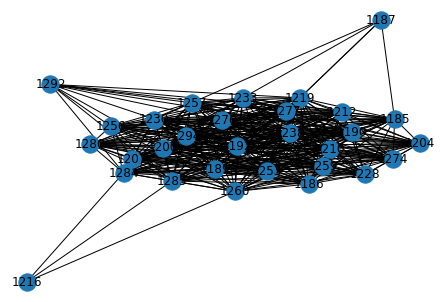

In [88]:
visits_matrix_filtered = visits_matrix_page[visits_matrix_page['VisitLen'] > 150]
visits_matrix_filtered = visits_matrix_filtered.head(30)
display(visits_matrix_filtered)

vsts = visits_matrix_filtered['VisitID'].tolist()
cols = visits_matrix_filtered.columns.tolist()[2:]
term_cols_len = len(cols)

G = nx.Graph()

for v in vsts:
    G.add_node(v)
    
for index1, row1 in tqdm(visits_matrix_filtered.iterrows(), total=len(visits_matrix_filtered)):
    for index2, row2 in visits_matrix_filtered.iterrows():
        if row1['VisitID'] == row2['VisitID']:
            break
        score = 0
        for col in visits_matrix_filtered.columns.tolist()[2:]:
            if (row1[col] == row2[col]):
                score += 1
        if score >= term_cols_len * 0.9875:
#             print([row1['VisitID'], row2['VisitID']])
            G.add_edge(row1['VisitID'], row2['VisitID'])

nx.draw(G, with_labels=True)

Computing transition probabilities:   0%|          | 0/30 [00:00<?, ?it/s]

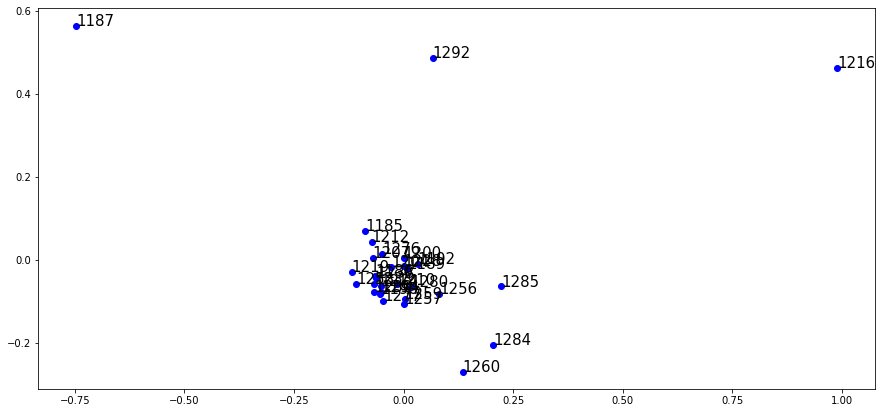

In [96]:
# node2vec
node2vec = Node2Vec(G, dimensions=term_cols_len, walk_length=30, num_walks=250, workers=4)
model = node2vec.fit(window=5, min_count=1, batch_words=4)

# visualize
pca = PCA(n_components=2)
pca_comps = pca.fit_transform([model.wv.get_vector(n) for n in list(map(str, G.nodes()))])
plt.figure(figsize=(15, 7))
plt.scatter(pca_comps[:, 0], pca_comps[:, 1], c='blue')
for name, x, y in zip(G.nodes(), pca_comps[:, 0], pca_comps[:, 1]):
        plt.annotate(name, xy=(x, y), size=15)